<a href="https://colab.research.google.com/github/duongDSAI64/ThiTHPT/blob/master/phantich2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use(
    'ggplot')
plt.rcParams['figure.figsize'] = (20, 7)

In [9]:
data = pd.read_csv(r"https://raw.githubusercontent.com/duongDSAI64/ThiTHPT/master/Diemthi2020.csv", encoding = "Latin-1")
data

,SBD,Toan,Ngu_van,Ngoai_ngu,Vat_ly,Hoa_hoc,Sinh_hoc,Lich_su,Dia_ly,GDCD,Ma_cum
0,1000001,7.0,6.00,NaN,NaN,NaN,NaN,8.00,NaN,NaN,1
1,1000002,9.0,6.00,9.4,7.25,8.75,7.25,NaN,NaN,NaN,1
2,1000003,8.8,6.50,6.0,8.25,8.75,4.75,NaN,NaN,NaN,1
3,1000004,7.0,NaN,8.2,NaN,6.00,NaN,NaN,NaN,NaN,1
4,1000005,9.0,7.50,9.2,NaN,NaN,NaN,5.75,7.25,9.25,1
...,...,...,...,...,...,...,...,...,...,...,...
811443,64005818,7.8,6.75,5.0,5.25,7.75,8.75,NaN,NaN,NaN,64
811444,64005819,9.2,7.25,7.6,5.50,8.00,7.75,NaN,NaN,NaN,64
811445,64005820,7.0,6.75,2.2,7.25,4.50,4.75,NaN,NaN,NaN,64
811446,64005821,6.8,7.00,3.4,NaN,NaN,NaN,5.75,6.50,7.25,64


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811448 entries, 0 to 811447
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SBD        811448 non-null  int64  
 1   Toan       807976 non-null  float64
 2   Ngu_van    799437 non-null  float64
 3   Ngoai_ngu  724973 non-null  float64
 4   Vat_ly     269363 non-null  float64
 5   Hoa_hoc    271142 non-null  float64
 6   Sinh_hoc   266478 non-null  float64
 7   Lich_su    534985 non-null  float64
 8   Dia_ly     519979 non-null  float64
 9   GDCD       458589 non-null  float64
 10  Ma_cum     811448 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 68.1 MB


### **Số lượng theo cụm thi**

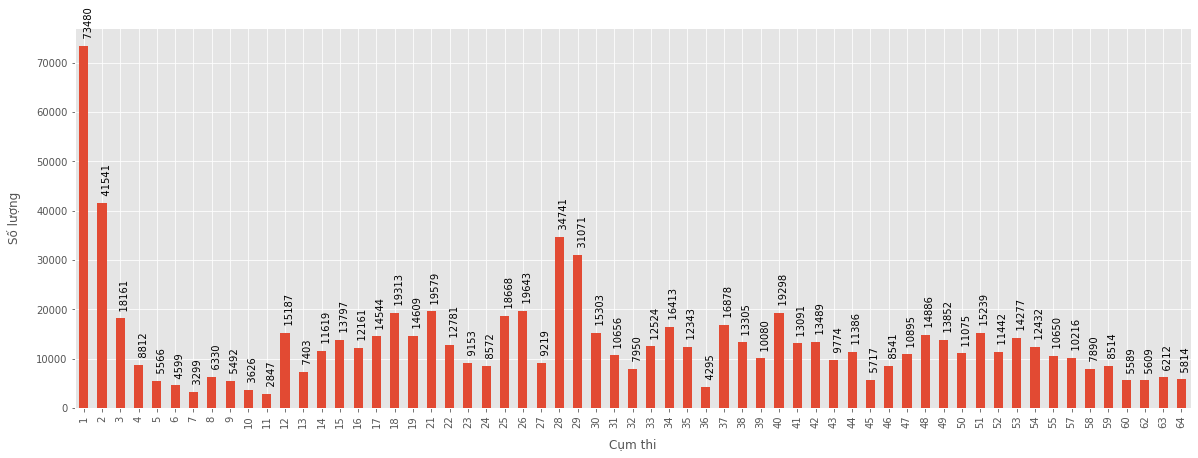

In [7]:
count_tinh = data['Ma_cum'].value_counts().sort_index()
plt.xlabel('Cụm thi', labelpad = 10)
plt.ylabel('Số lượng', labelpad = 15)
for index, value in enumerate(count_tinh.values):
    plt.text(index, value, '   ' + str(value), rotation = 90)
count_tinh.plot.bar()

### **Tính điểm các khối**

In [12]:
data['A'] = data['Toan']+data['Vat_ly']+data['Hoa_hoc']
data['B'] = data['Toan']+data['Sinh_hoc']+data['Hoa_hoc']
data['C'] = data['Ngu_van']+data['Lich_su']+data['Dia_ly']
data['A1'] = data['Toan'] + data['Ngoai_ngu'] + data['Vat_ly']
data['D1'] = data['Toan'] + data['Ngu_van'] + data['Ngoai_ngu']
data['A-BK'] = (2*data['Toan']+data['Vat_ly']+data['Hoa_hoc'])*0.75
data['A1-BK'] = (2*data['Toan'] + data['Ngoai_ngu'] + data['Vat_ly'])*0.75 

### **Phổ điểm**

In [13]:
data

,SBD,Toan,Ngu_van,Ngoai_ngu,Vat_ly,Hoa_hoc,Sinh_hoc,Lich_su,Dia_ly,GDCD,Ma_cum,A,B,C,A1,D1,A-BK,A1-BK
0,1000001,7.0,6.00,NaN,NaN,NaN,NaN,8.00,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000002,9.0,6.00,9.4,7.25,8.75,7.25,NaN,NaN,NaN,1,25.00,25.00,NaN,25.65,24.40,25.5000,25.9875
2,1000003,8.8,6.50,6.0,8.25,8.75,4.75,NaN,NaN,NaN,1,25.80,22.30,NaN,23.05,21.30,25.9500,23.8875
3,1000004,7.0,NaN,8.2,NaN,6.00,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000005,9.0,7.50,9.2,NaN,NaN,NaN,5.75,7.25,9.25,1,NaN,NaN,20.50,NaN,25.70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811443,64005818,7.8,6.75,5.0,5.25,7.75,8.75,NaN,NaN,NaN,64,20.80,24.30,NaN,18.05,19.55,21.4500,19.3875
811444,64005819,9.2,7.25,7.6,5.50,8.00,7.75,NaN,NaN,NaN,64,22.70,24.95,NaN,22.30,24.05,23.9250,23.6250
811445,64005820,7.0,6.75,2.2,7.25,4.50,4.75,NaN,NaN,NaN,64,18.75,16.25,NaN,16.45,15.95,19.3125,17.5875
811446,64005821,6.8,7.00,3.4,NaN,NaN,NaN,5.75,6.50,7.25,64,NaN,NaN,19.25,NaN,17.20,NaN,NaN


In [14]:
def phodiem(data, mon_hoc, title):
  data_show = []
  if (len(mon_hoc)<3 or ('-' in mon_hoc)):
    bins = [i/2 for i in range(0,61)]
    data_show = data[mon_hoc].value_counts(bins = bins).sort_index()
  elif (mon_hoc == 'Ngu_van'):
    bins = [i/4 for i in range(0,41)]
    data_show = data[mon_hoc].value_counts(bins = bins).sort_index()
  else:
    data_show = data[mon_hoc].value_counts().sort_index()

  data_show.plot(kind='bar', colormap='plasma')

  font = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 12,
          }
  font_title = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }
  
  plt.grid(c='white', linewidth=2, fillstyle='full', b=True)
  plt.ylim(0, data_show.values.max()*1.4)
  plt.xlabel('Điểm', labelpad = 10)
  plt.ylabel('Số lượng', labelpad = 15)
  plt.title(title)
  plt.tight_layout()
  for index, value in enumerate(data_show.values):
    plt.text(index, value, '   ' + str(value), rotation = 90)  
  data_show.plot.bar()
  plt.show()
 

In [18]:
ma_Monhoc = [
    {'Mon_hoc':'Toan', 'Ten': 'Toán'},
    {'Mon_hoc':'Ngu_van', 'Ten': 'Ngữ Văn'},
    {'Mon_hoc':'Ngoai_ngu', 'Ten': 'Tiếng Anh'},
    {'Mon_hoc':'Hoa_hoc', 'Ten': 'Hóa học'},
    {'Mon_hoc':'Sinh_hoc', 'Ten': 'Sinh hoc'},
    {'Mon_hoc':'Vat_ly', 'Ten': 'Vật lý'},
    {'Mon_hoc':'Lich_su', 'Ten': 'Lịch sử'},
    {'Mon_hoc':'Dia_ly', 'Ten': 'Địa lý'},
    {'Mon_hoc':'GDCD', 'Ten': 'Giáo dục công dân'},
    {'Mon_hoc':'A', 'Ten': 'Khối A'},
    {'Mon_hoc':'B', 'Ten': 'Khối B'},
    {'Mon_hoc':'C', 'Ten': 'Khối C'},
    {'Mon_hoc':'D1', 'Ten': 'Khối D1'},
    {'Mon_hoc':'A1', 'Ten': 'Khối A1'},
    {'Mon_hoc':'A-BK', 'Ten': 'Khối A theo BK'},
    {'Mon_hoc':'A1-BK', 'Ten': 'Khối A1 theo BK'}
]

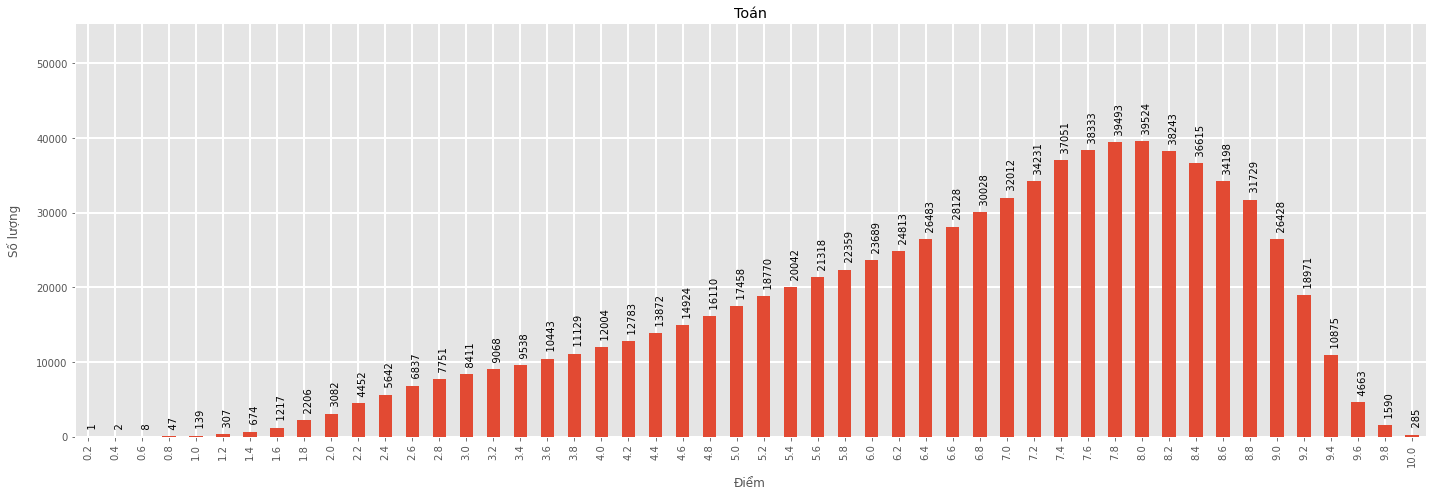

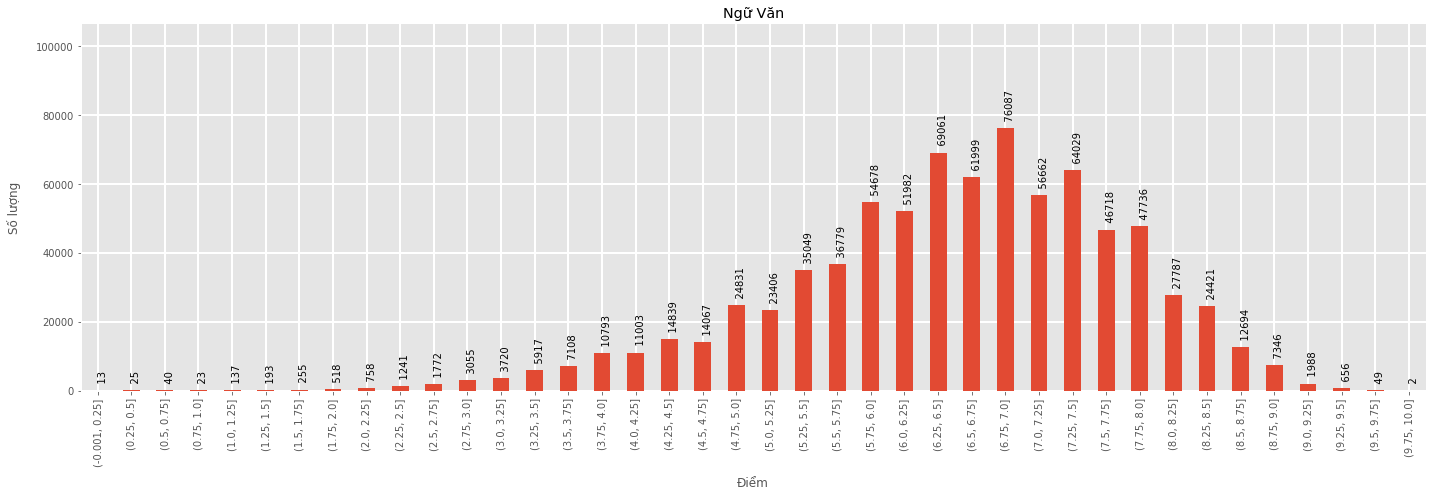

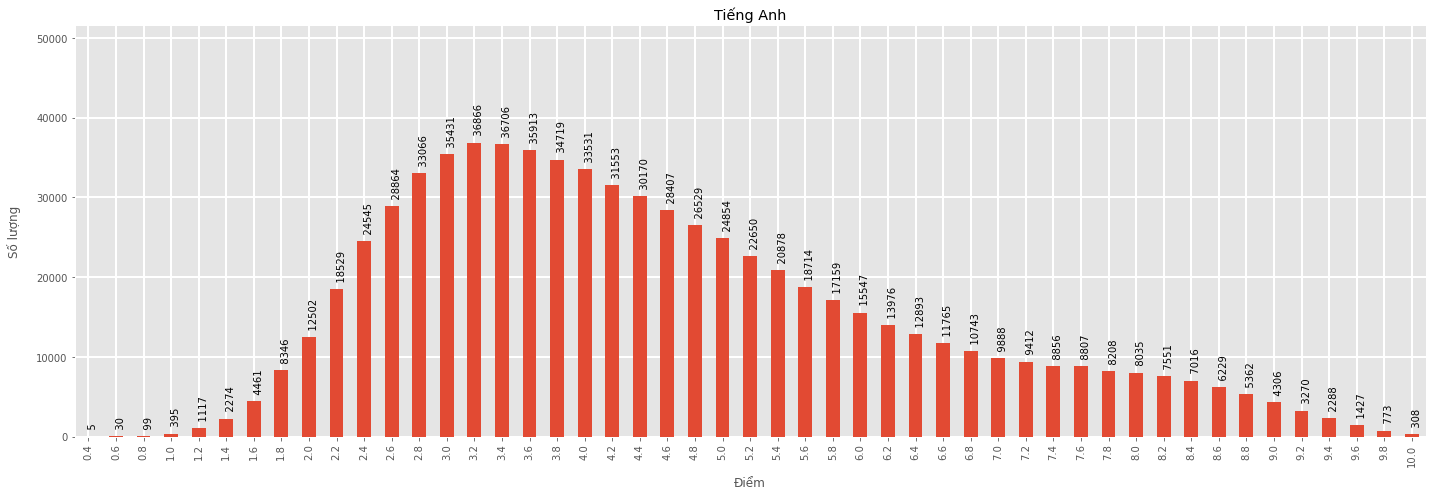

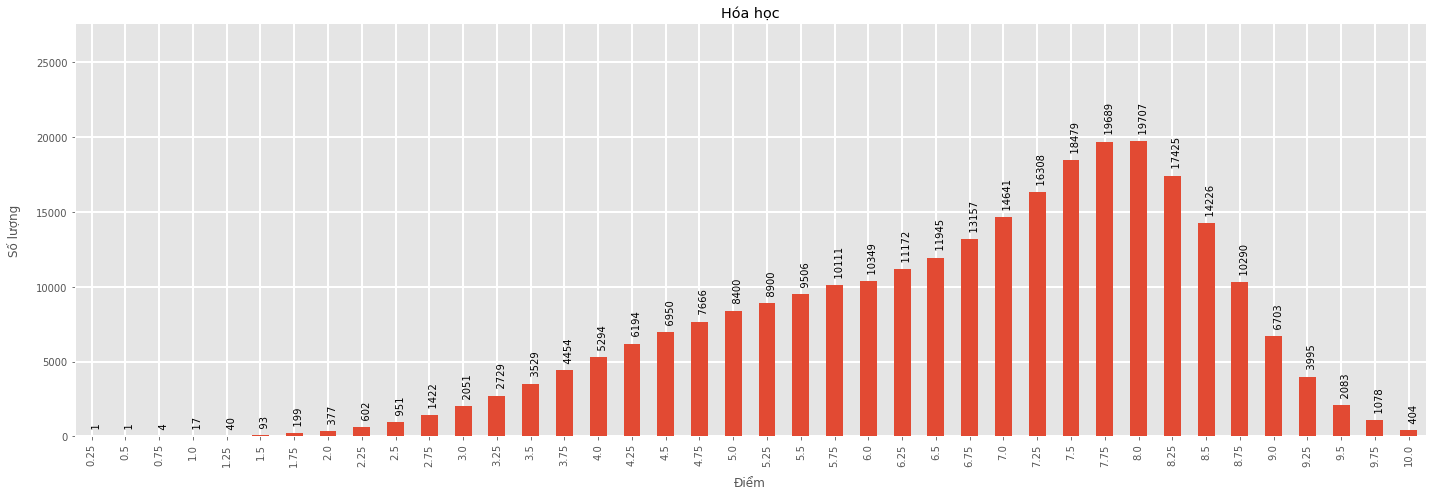

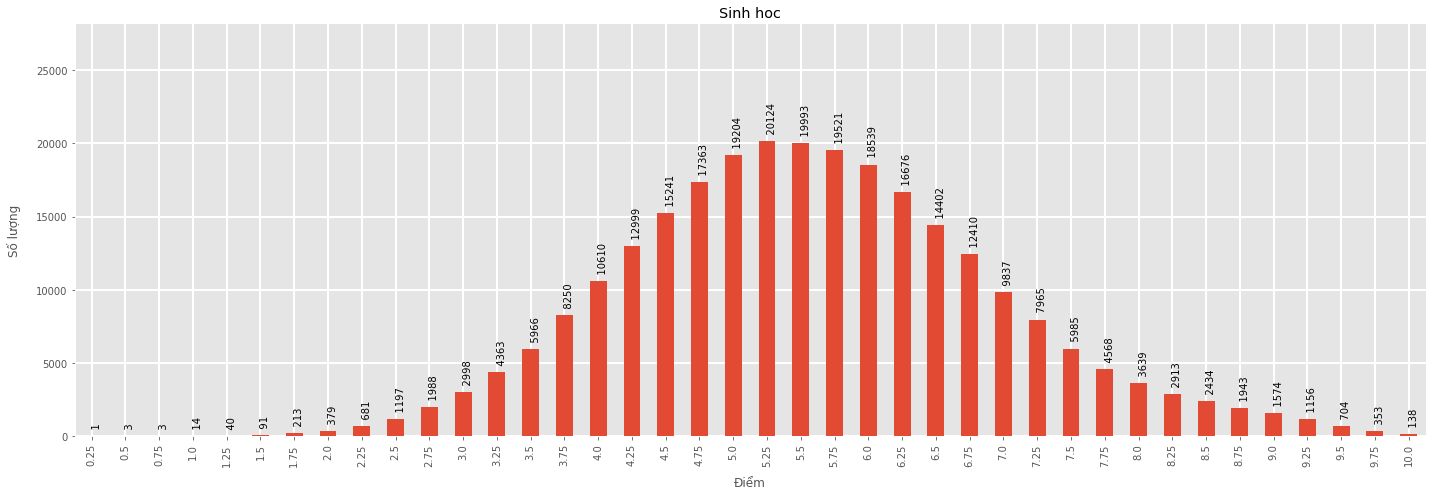

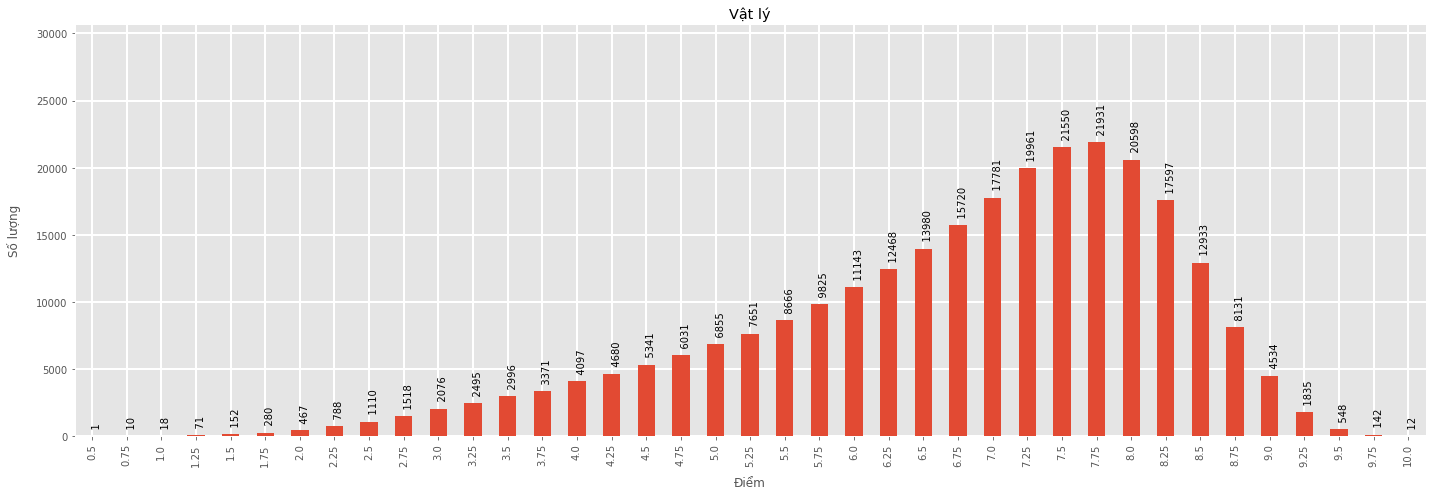

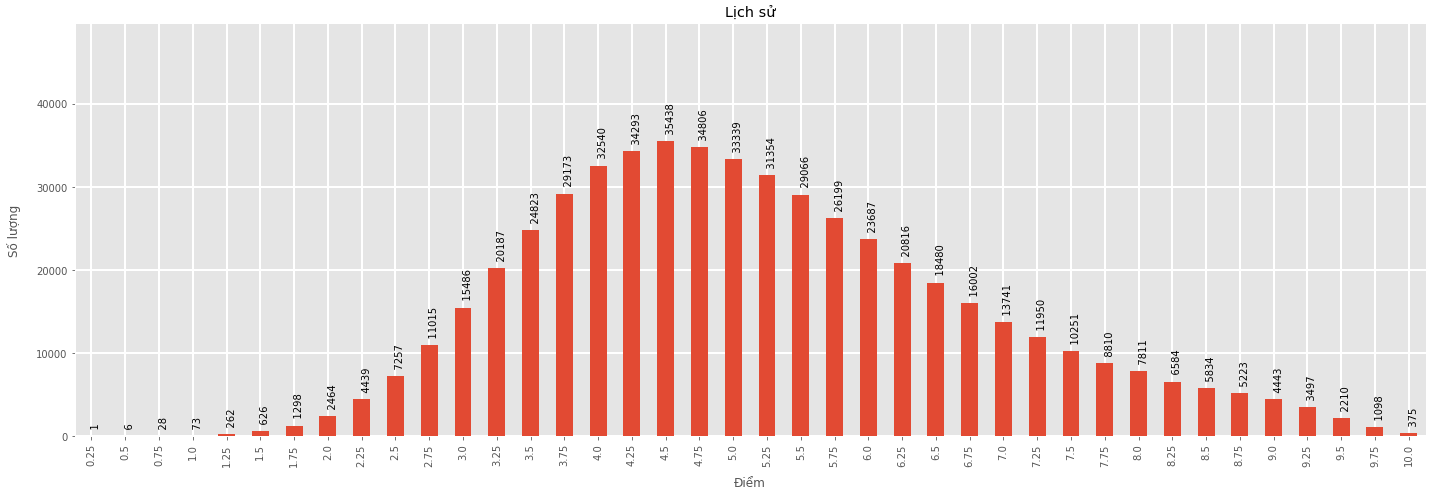

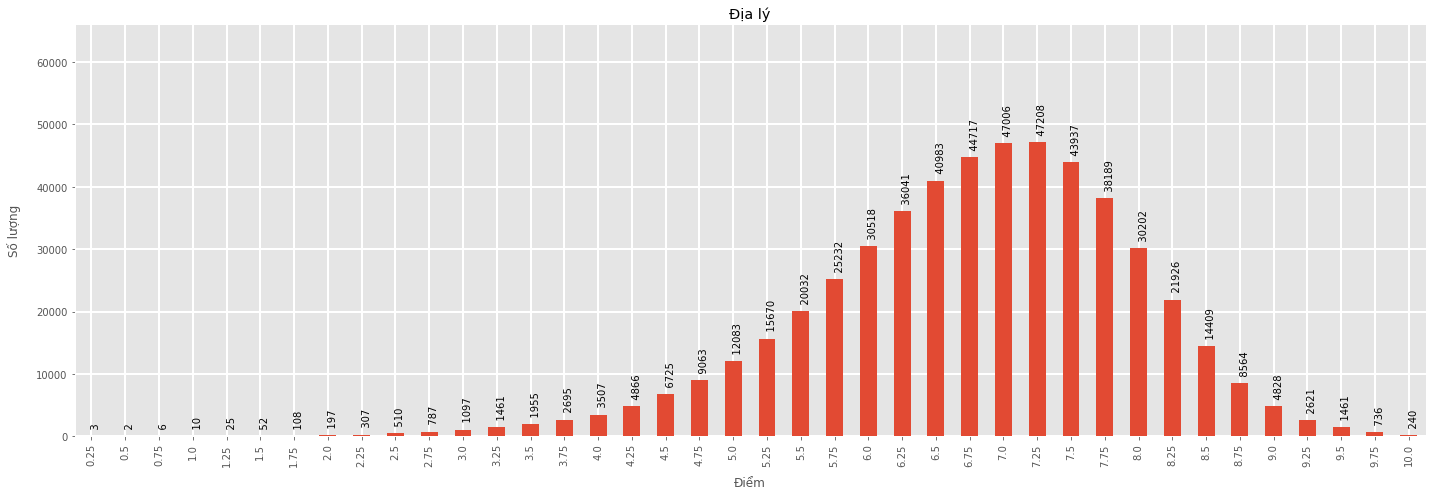

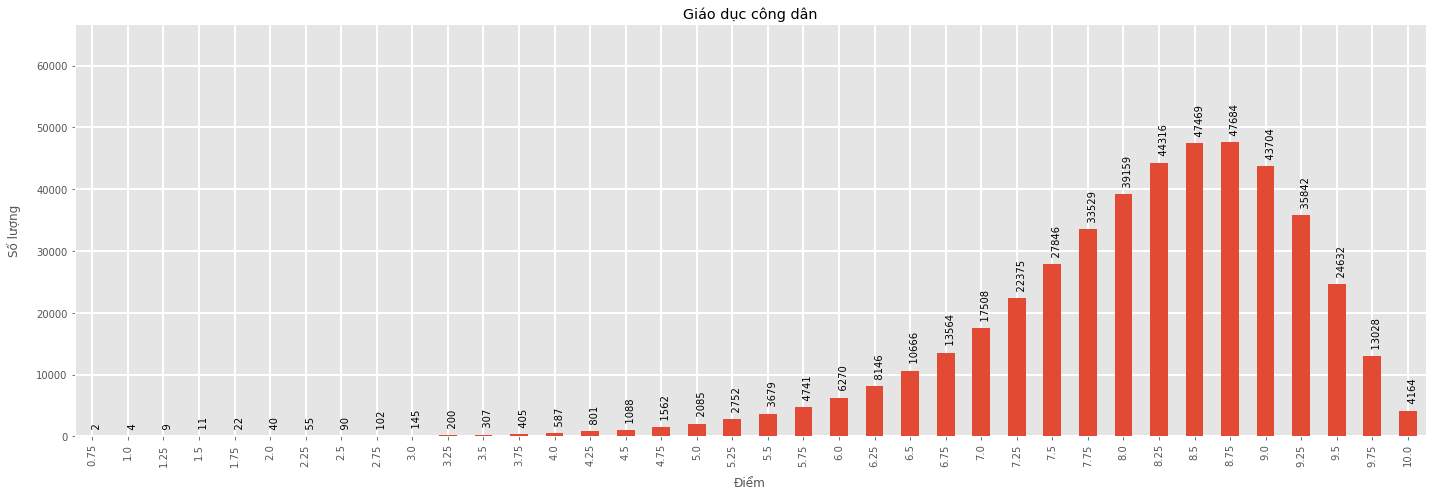

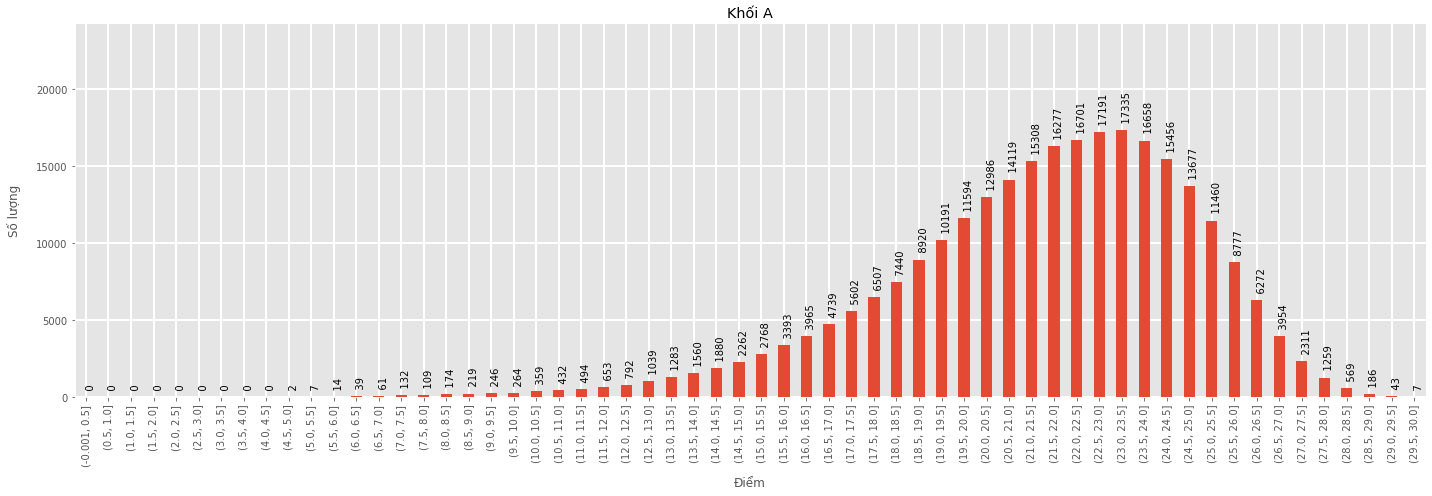

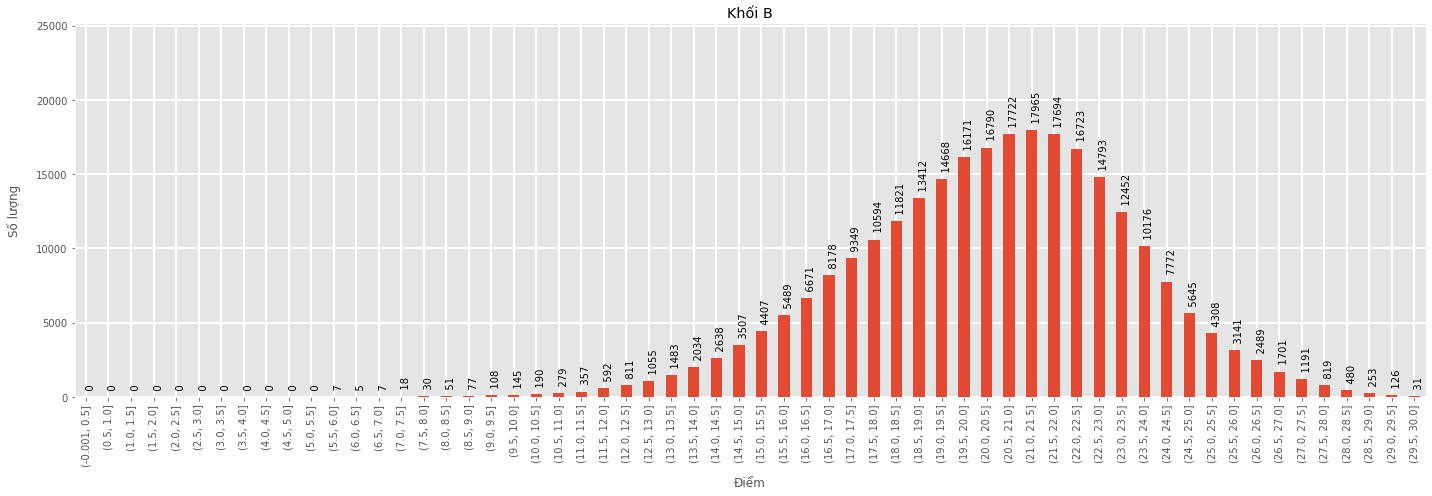

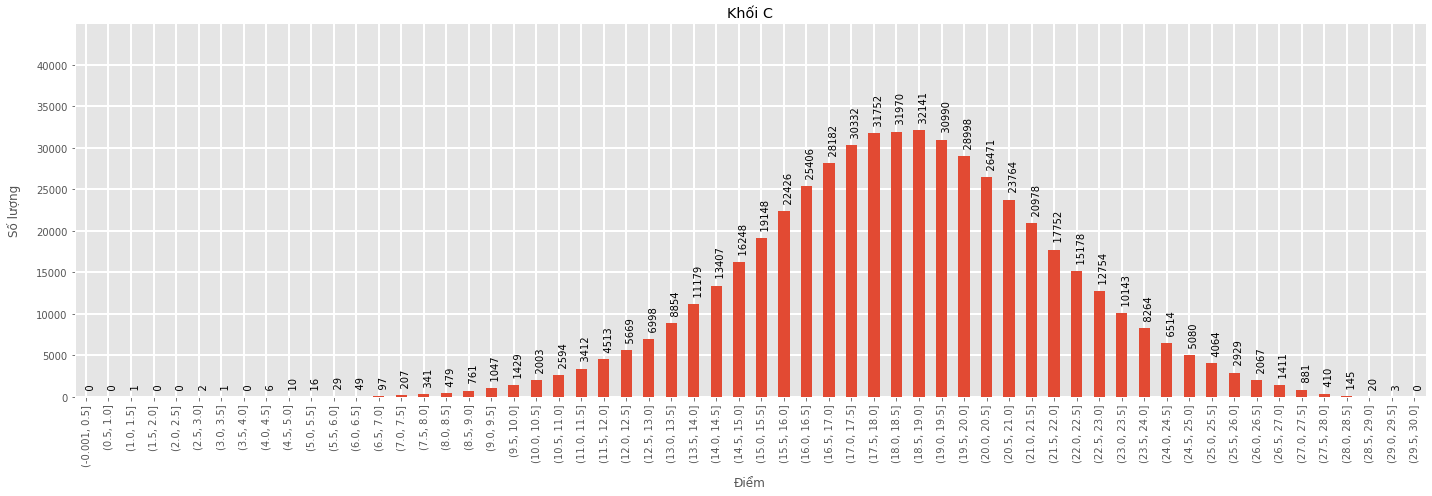

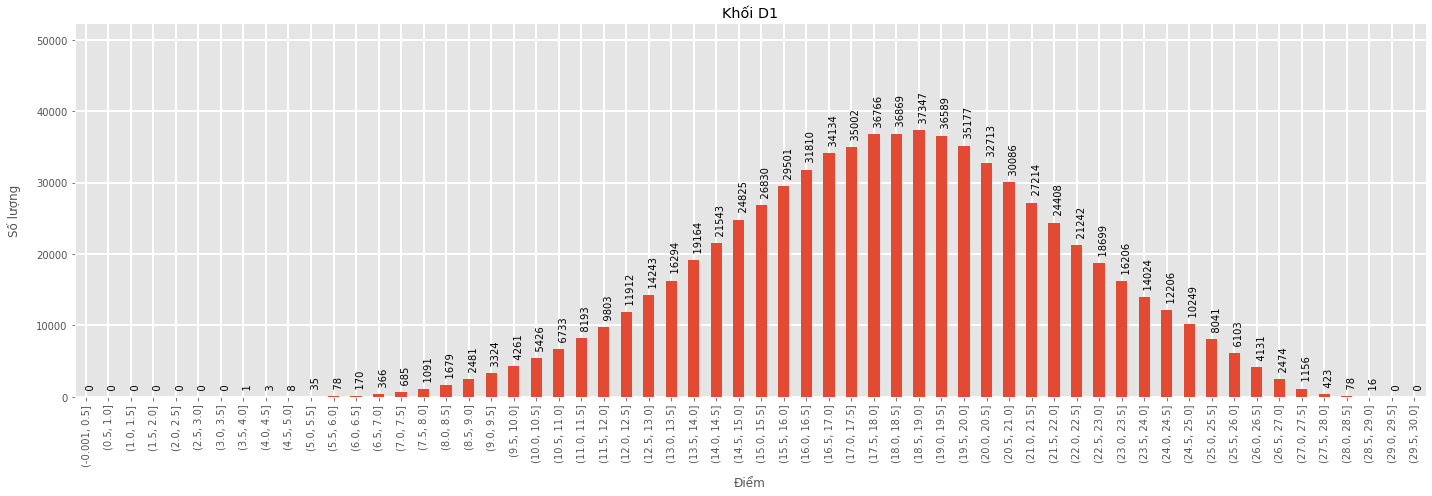

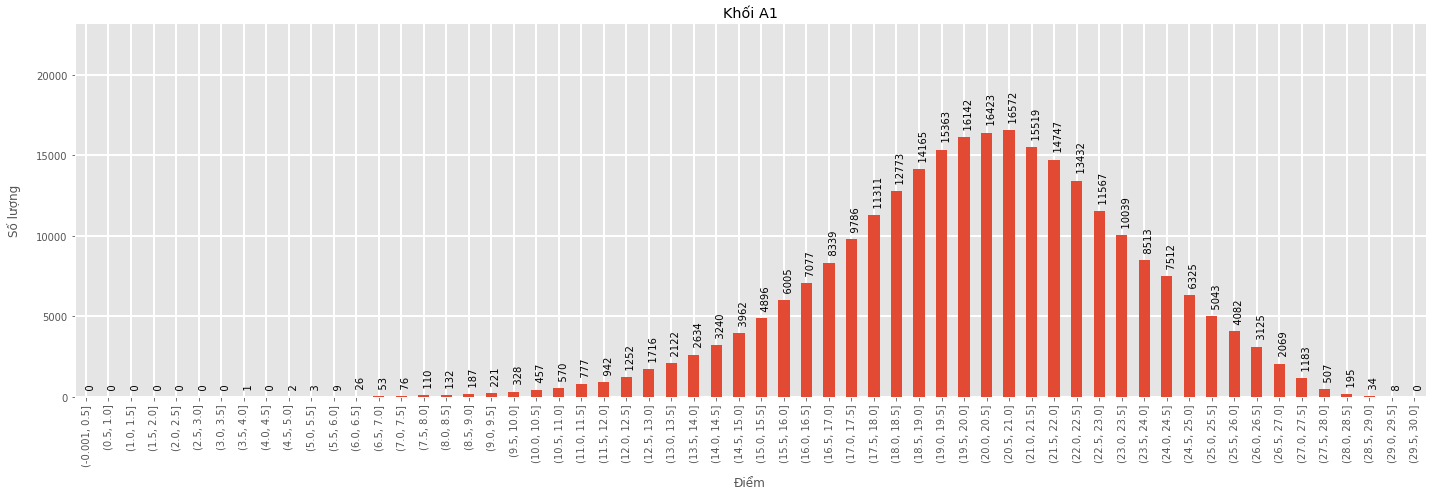

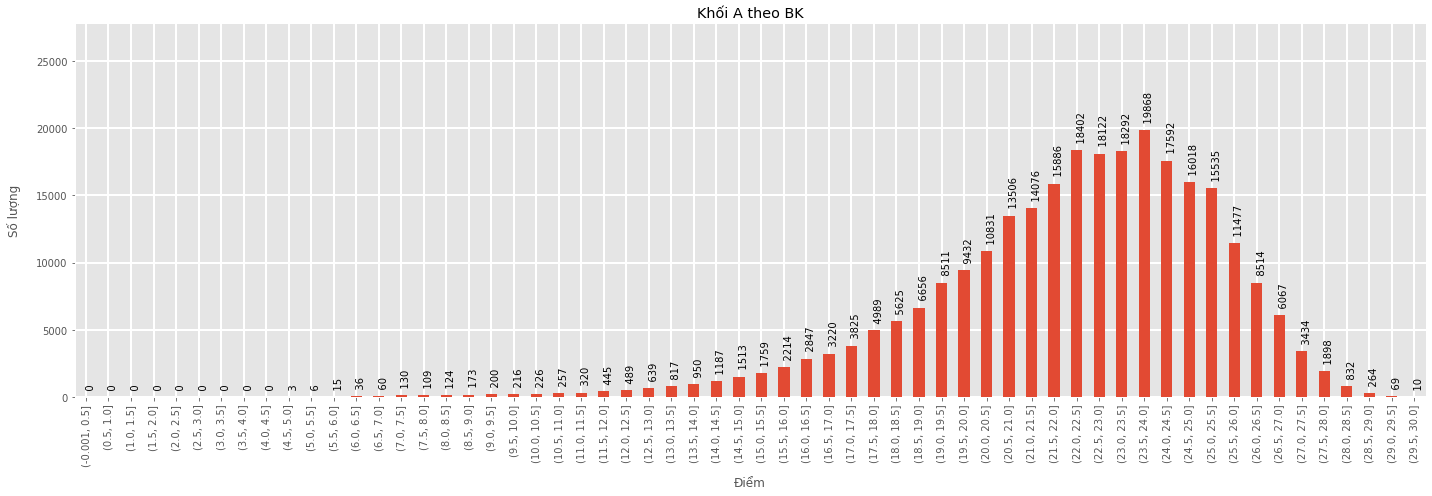

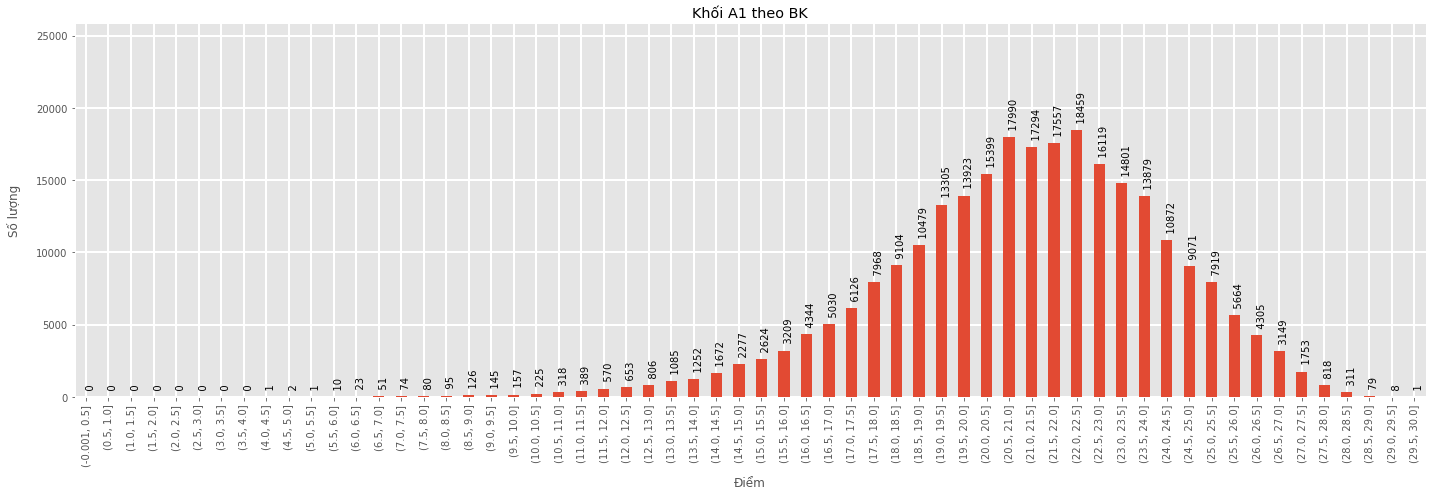

In [19]:
for node in ma_Monhoc:
  phodiem(data, node['Mon_hoc'], node['Ten'])